In [ ]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()


Saving RELIANCE.NS.csv to RELIANCE.NS (2).csv


{'RELIANCE.NS.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2015-06-08,453.399994,455.000000,441.549988,442.725006,423.958771,4958862\n2015-06-09,441.774994,445.325012,438.674988,441.850006,423.120880,4184606\n2015-06-10,443.000000,454.950012,442.500000,452.899994,433.702423,6176034\n2015-06-11,453.000000,454.750000,436.825012,438.575012,419.984650,6709574\n2015-06-12,439.500000,446.350006,439.125000,444.924988,426.065491,9849112\n2015-06-15,447.450012,452.500000,445.000000,450.875000,431.763306,5878506\n2015-06-16,449.500000,452.500000,446.600006,451.975006,432.816681,6368010\n2015-06-17,452.524994,471.174988,447.000000,465.600006,445.864136,11992678\n2015-06-18,466.274994,491.000000,466.250000,489.475006,468.727112,22568840\n2015-06-19,491.250000,503.200012,491.250000,498.325012,477.201996,20897502\n2015-06-22,498.475006,504.350006,493.250000,495.850006,474.831879,8866370\n2015-06-23,496.325012,501.350006,495.500000,497.500000,476.411926,7318090\n2015-06-24,497.500000,503.225006

In [ ]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('RELIANCE.NS.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,475.988098,476.978729,471.802795,472.917206,462.291687,4002515.0
1,2016-06-07,474.130707,475.963348,471.332245,473.041046,462.412750,8747391.0
2,2016-06-08,474.502197,474.502197,470.118744,472.570496,461.952759,5600539.0
3,2016-06-09,475.492798,483.640564,473.610657,481.015442,470.208008,7219470.0
4,2016-06-10,482.427063,487.578247,479.603821,483.764404,472.895172,7530182.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-05-31,2102.000000,2191.699951,2085.050049,2160.300049,2160.300049,27285782.0
1230,2021-06-01,2166.000000,2202.000000,2146.500000,2168.899902,2168.899902,12928379.0
1231,2021-06-02,2157.000000,2209.500000,2157.000000,2201.250000,2201.250000,11366816.0
1232,2021-06-03,2221.000000,2250.000000,2196.100098,2209.649902,2209.649902,11064116.0
1233,2021-06-04,2214.800049,2216.449951,2184.250000,2190.500000,2190.500000,6677278.0


In [ ]:
df_close = df['Close']

In [ ]:
df_close.shape

(1232,)

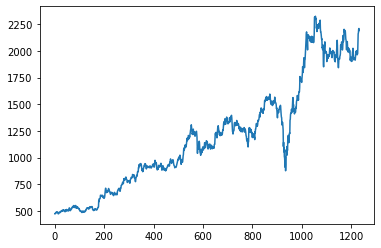

In [ ]:
plt.plot(df_close)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape

(1232, 1)

In [ ]:


df_close



array([[8.95310020e-04],
       [9.62131650e-04],
       [7.08232118e-04],
       ...,
       [9.33469717e-01],
       [9.38002139e-01],
       [9.27669228e-01]])

In [ ]:
#Split the data into train and test split 
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:


time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)



In [ ]:


#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [ ]:


#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)



Epoch 1/100
13/13 [==============================] - 10s 295ms/step - loss: 0.0331 - val_loss: 0.0715
Epoch 2/100
13/13 [==============================] - 3s 241ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 3/100
13/13 [==============================] - 3s 239ms/step - loss: 0.0024 - val_loss: 0.0086
Epoch 4/100
13/13 [==============================] - 3s 242ms/step - loss: 9.7169e-04 - val_loss: 0.0044
Epoch 5/100
13/13 [==============================] - 3s 242ms/step - loss: 8.0549e-04 - val_loss: 0.0040
Epoch 6/100
13/13 [==============================] - 3s 237ms/step - loss: 7.2919e-04 - val_loss: 0.0060
Epoch 7/100
13/13 [==============================] - 3s 243ms/step - loss: 7.2050e-04 - val_loss: 0.0054
Epoch 8/100
13/13 [==============================] - 3s 240ms/step - loss: 7.1297e-04 - val_loss: 0.0043
Epoch 9/100
13/13 [==============================] - 3s 242ms/step - loss: 6.9776e-04 - val_loss: 0.0044
Epoch 10/100
13/13 [==============================] - 3s 242ms/ste

In [ ]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)



In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

1074.0451565597614

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

2030.833537094083

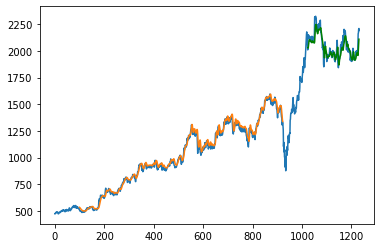

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, color = "green")
plt.show()